用多边形顶点的逆时针序列表示凸多边形，即P={V0,V1,…,Vn}表示具有n+1条边的凸多边形。给定凸多边形P，以及定义在由多边形的边和弦组成的三角形上的权函数w。要求确定该凸多边形的三角剖分，使得即该三角剖分中诸三角形上权之和为最小。若P={V0,V1……Vn}的最优三角剖分T包含三角形V0VkVn,则T的权为三个部分权之和：三角形V0VkVn的权，多边形{V0,V1……Vk}的权和多边形{Vk,Vk+1……Vn}的权之和。可以断言，由T确定的这两个子多边形的三角剖分也是最优的。

c[i][j]=$\begin{equation}
\left\{
\begin{aligned}
0 \qquad i=j \\
\min \limits_{i \le k<j} \{ t[i][k]+t[k+1][j]+\omega (\nu _{i-1}\nu _{k} \nu _{j}) \} \qquad i<j \\ 
\end{aligned}
\right.
\end{equation} $

In [1]:
from numpy import *
import networkx as nx
import matplotlib.pyplot as plt

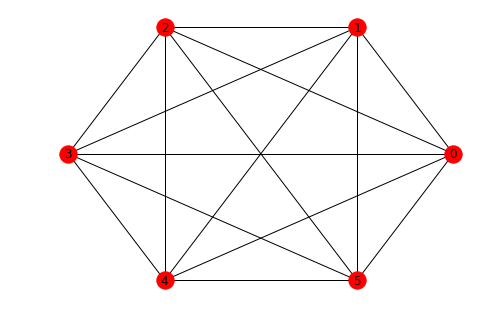

In [2]:
G=nx.Graph()
global N
N=6
t=[[0]*N for i in range(N)]
s=[[0]*N for i in range(N)]
weight=[[0,2,2,3,1,4],[2,0,1,5,2,3],[2,1,0,2,1,4],[3,5,2,0,6,2],[1,2,1,6,0,1],[4,3,4,2,1,0]]
for i in range(N):
    for j in range(i+1,N):
        G.add_weighted_edges_from([(i, j, weight[i][j])])
nx.draw(G,with_labels=True,pos=nx.circular_layout(G))
plt.show()

In [3]:
t

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [4]:
s

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [5]:
weight

[[0, 2, 2, 3, 1, 4],
 [2, 0, 1, 5, 2, 3],
 [2, 1, 0, 2, 1, 4],
 [3, 5, 2, 0, 6, 2],
 [1, 2, 1, 6, 0, 1],
 [4, 3, 4, 2, 1, 0]]

In [6]:
#得到三角形的权值
def get_weight(a,b,c):
    return weight[a][b]+weight[b][c]+weight[c][a]

In [7]:
def minweight():
    minval=0
    for r in range(2,N):
        for i in range(1,N-r+1):
            j=i+r-1
            minval=float("INF")
            for k in range(i,j):
                #t[i][j]表示多边形{Vi-1VkVj}的最优权值
                t[i][j]=t[i][k]+t[k+1][j]+get_weight(i-1,k,j)
                if t[i][j]<minval:
                    minval=t[i][j]
                    s[i][j]=k
            t[i][j]=minval

In [8]:
minweight()
print(t[1][N-1])

24


In [9]:
lines=[]
def backtract(a,b):
    if a==b:
        return
    backtract(a,s[a][b])
    backtract(s[a][b]+1,b)
    print("最优三角:v",a-1,"v",s[a][b],"v",b)
    lines.append((a-1,s[a][b]))
    lines.append((s[a][b],b))
    lines.append((b,a-1))
backtract(1,5)

最优三角:v 2 v 3 v 4
最优三角:v 1 v 2 v 4
最优三角:v 0 v 1 v 4
最优三角:v 0 v 4 v 5


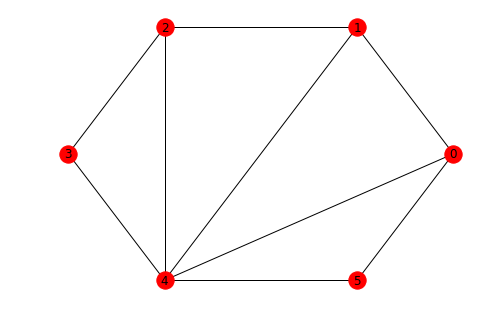

In [10]:
GG=nx.Graph()
GG.add_edges_from(lines)
nx.draw(GG,with_labels=True,pos=nx.circular_layout(G))
plt.show()

In [11]:
t

[[0, 0, 0, 0, 0, 0],
 [0, 0, 5, 12, 18, 24],
 [0, 0, 0, 8, 13, 19],
 [0, 0, 0, 0, 9, 15],
 [0, 0, 0, 0, 0, 9],
 [0, 0, 0, 0, 0, 0]]

In [12]:
s

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 2, 1, 4],
 [0, 0, 0, 2, 2, 4],
 [0, 0, 0, 0, 3, 4],
 [0, 0, 0, 0, 0, 4],
 [0, 0, 0, 0, 0, 0]]